In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from Function import *

#klappt für:
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_4.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_5.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_3.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\muc_bhf_1.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\kempten1.mp4"

#klappt nicht mit:
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\kempten2.mp4", da Querbild mit sehr viel Spielegnden Flächen links und rechts

video_path = "C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Videos\\muc_bhf_3.mp4"
frames = read_video_frames(video_path)
print(len(frames))

#frames1 = frames[200:400]

1309


In [2]:
frames1 = frames[0:500]

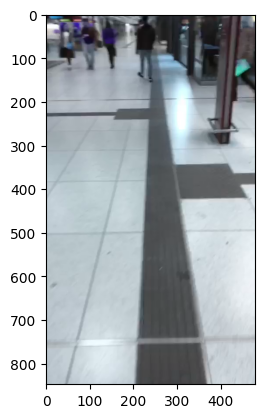

In [3]:
img = frames1[300][1]
plt.imshow(img)

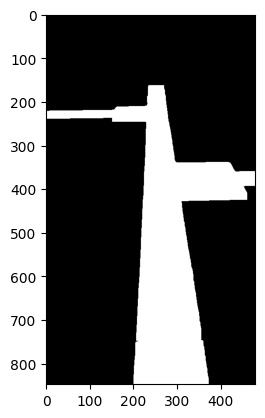

In [4]:
color = "B"
img_lines_seg = seg_orientation_lines(img, color)

plt.imshow(img_lines_seg)

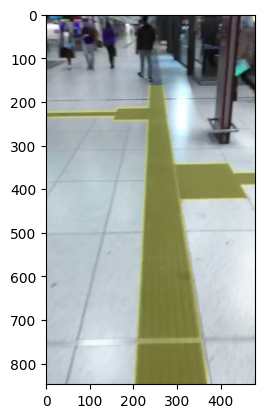

In [5]:
img_lines_mraked = draw_seg_orientationline(img, img_lines_seg)
plt.imshow(img_lines_mraked)

In [235]:
white_pixels = cv2.countNonZero(img_lines_seg)
print(white_pixels)

357071


848


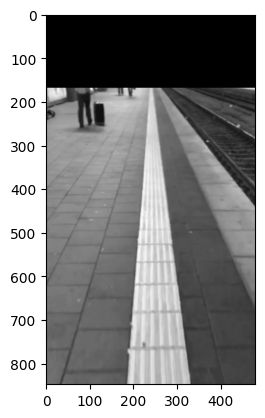

In [21]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.gray()

#plt.imshow(gray_image)

img_blur = cv2.GaussianBlur(gray_image, (5,5), 0)

Farbe = "W"   #Farbe der Orientierungslinie wählen: w für weiß und s für schwarz

img_b_or_w = white_or_black(img_blur, Farbe)

#Oberes vietrl des Bildes schwärzen
h = img_b_or_w.shape[0]
print(h)
region = 1/5
top_region = img_b_or_w[0:int(h*region), :]  # Obere 1/4 des Bildes auswählen

# Schwärze den ausgewählten Bereich
top_region = np.zeros_like(top_region)

# Füge den geschwärzten Bereich wieder in das ursprüngliche Bild ein
img_b_or_w[0:int(h*region), :] = top_region

plt.imshow(img_b_or_w)

[130, 130, 130, 130, 130, 130, 129, 129, 129, 129, 129, 129, 129, 129, 128, 128, 128, 128, 128, 128, 128, 129, 129, 130, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 129, 122, 115, 112, 114, 119, 124, 127, 129, 130, 131, 131, 131, 131, 130, 130, 130, 130, 130, 130, 130, 129, 129, 129, 130, 130, 130, 131, 131, 132, 133, 133, 134, 134, 133, 133, 133, 133, 133, 133, 133, 134, 135, 136, 136, 136, 136, 135, 135, 134, 134, 133, 134, 134, 134, 134, 134, 135, 135, 134, 132, 128, 120, 111, 108, 109, 115, 119, 122, 122, 122, 121, 121, 121, 121, 122, 122, 123, 124, 124, 124, 124, 124, 124, 124, 124, 124, 123, 123, 122, 122, 122, 123, 124, 125, 127, 128, 128, 128, 127, 127, 126, 125, 125, 124, 123, 123, 123, 123, 123, 123, 122, 122, 122, 122, 121, 121, 121, 120, 120, 118, 112, 105, 105, 114, 124, 130, 132, 131, 131, 131, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 129, 129, 129, 128, 127, 126, 125, 125, 125, 125, 125, 125, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 123,

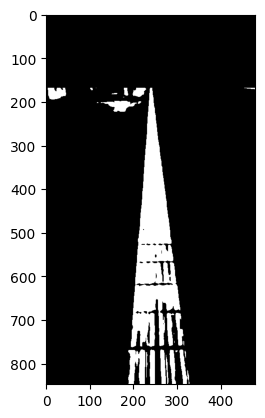

In [22]:
thresh_1, thresh_2 = find_thresh(img_b_or_w, 0.2)

print("1:", thresh_1)
print("2:", thresh_2)

t, seg = cv2.threshold(img_b_or_w,thresh_2,255,cv2.THRESH_BINARY)
plt.imshow(seg)
print(seg.dtype)

In [41]:
white_pixels = cv2.countNonZero(seg)
print(white_pixels)

19044


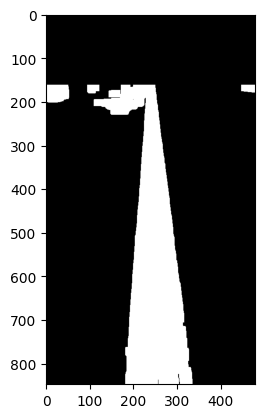

In [23]:
bw_new = cv2.dilate(seg.astype('uint8'), np.ones((3,3)), iterations=7)
plt.imshow(bw_new)

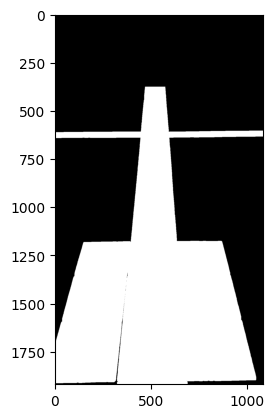

In [23]:
img_largest = find_largest_component(bw_new)
plt.imshow(img_largest)

In [44]:
white_pixels = cv2.countNonZero(img_largest)
print(white_pixels)

26415


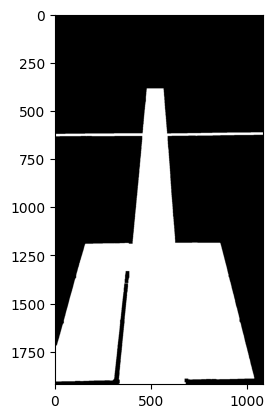

In [25]:
iteration=9
bw_new2 = cv2.erode(img_largest.astype('uint8'), np.ones((3,3)), iterations=iteration)
plt.imshow(bw_new2)

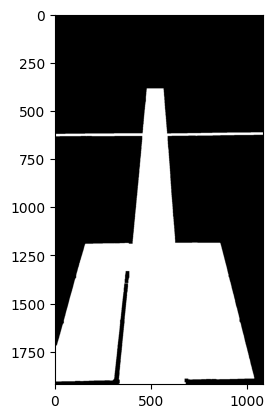

In [26]:

img_largest = find_largest_component(bw_new2)
plt.imshow(img_largest)

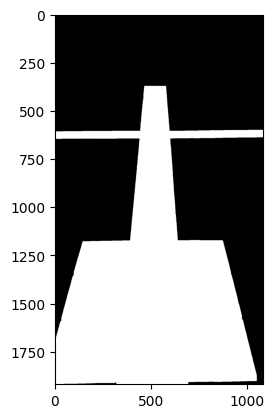

In [27]:
bw_new3 = cv2.dilate(img_largest.astype('uint8'), np.ones((3,3)), iterations=int(iteration*1.5))
plt.imshow(bw_new3)

848
[25, 25, 25, 25, 26, 27, 28, 28, 29, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 29, 30, 31, 30, 29, 27, 26, 31, 49, 69, 74, 57, 37, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 30, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 34, 34, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 34, 34, 34, 34, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 32, 30, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 27, 27, 27, 27, 26, 24, 22, 21, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 23, 34, 65, 109, 141, 152, 155, 163, 172, 176, 172, 165, 164, 166, 166, 165, 164, 167, 174, 178, 176, 167, 159, 160, 164, 167, 167, 167, 169, 172, 174, 170, 164, 162, 166, 168, 16

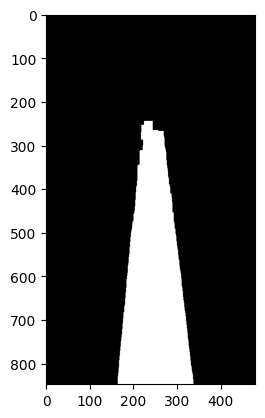

In [13]:
color = "B"
img_lines_seg = seg_orientation_lines(img, color, 0.18)

plt.imshow(img_lines_seg)

In [ ]:
#Notes:

#Bei schwarzen Orientierungslinien bei muc_bhf_3 thresh_1 besser als 2 und percentage eher bei 0.185...
#[300]: 0.22
#[380]: 0.159 gut, 17 okay
#[430]: 0.165 gut
#[499]: 0.18 gut drüber fehlerhaft
#[550]: 0.176 gut drüber falsch
#[600]-[630]: immer fehlerhaft
#[690]: 0.165: wieder besser, aber nicht top
#[730]: 0.165: top
